# Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Setando uma semente

In [2]:
seed = 1
random.seed(seed)
np.random.seed(seed)

# Importando o banco de dados

In [3]:
data = pd.read_csv('geoquimica.csv', ';')

### Análise exploratória dos dados

In [4]:
# Exibe as 5 primeiras linhas do databese 
data.head()

,id,sample,SiO2,Al2O3,Fe2O3,MgO,CaO,Na2O,K2O,TiO2,...,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Type
0,GS-01,SANA 04,73.84,13.45,1.71,0.34,1.16,2.76,5.57,0.382,...,0.99,6.6,0.8,3.6,0.5,1.1,0.12,0.6,0.07,s
1,GS-02,SANA 05,67.45,14.89,3.48,0.75,0.95,2.72,6.08,0.759,...,1.24,11.6,1.1,4.6,0.7,1.6,0.21,1.3,0.18,s
2,GS-03,SANA 06A,67.60,13.86,3.55,0.68,1.86,2.56,5.88,0.744,...,2.36,12.5,1.5,7.2,1.3,3.5,0.49,2.7,0.34,s
3,GS-04,SANA 06B,68.21,14.61,3.69,0.80,1.98,2.91,5.08,0.898,...,1.81,9.1,0.9,4.2,0.7,1.8,0.21,1.1,0.14,s
4,GS-05,SANA 07,69.38,14.38,2.45,0.57,1.89,2.79,5.77,0.587,...,1.54,5.7,0.6,2.8,0.5,1.2,0.15,0.8,0.10,s


In [5]:
# Exibe o tamanho do database (n° de linhas/n° de colunas)
data.shape

(543, 50)

In [6]:
# Exibe informações do database
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      543 non-null    object 
 1   sample  543 non-null    object 
 2   SiO2    543 non-null    float64
 3   Al2O3   543 non-null    float64
 4   Fe2O3   543 non-null    float64
 5   MgO     543 non-null    float64
 6   CaO     543 non-null    float64
 7   Na2O    543 non-null    float64
 8   K2O     543 non-null    float64
 9   TiO2    543 non-null    float64
 10  P2O5    541 non-null    float64
 11  MnO     530 non-null    float64
 12  LOI     506 non-null    float64
 13  Total   543 non-null    float64
 14  Cs      296 non-null    float64
 15  Rb      530 non-null    float64
 16  Ba      497 non-null    float64
 17  Sr      518 non-null    float64
 18  Pb      420 non-null    float64
 19  Th      470 non-null    float64
 20  U       474 non-null    object 
 21  Zr      503 non-null    float64
 22  Hf

In [7]:
# Exibe a quantidade de valores núlos por variável 
data.isnull().sum()

id          0
sample      0
SiO2        0
Al2O3       0
Fe2O3       0
MgO         0
CaO         0
Na2O        0
K2O         0
TiO2        0
P2O5        2
MnO        13
LOI        37
Total       0
Cs        247
Rb         13
Ba         46
Sr         25
Pb        123
Th         73
U          69
Zr         40
Hf        189
Ta        199
Y          37
Nb         52
Sc        174
Cr        207
Ni        199
Co        340
V         193
W         429
Ga         96
Zn        190
Cu        273
La         57
Ce         72
Pr        225
Nd        150
Sm        150
Eu        150
Gd        149
Tb        164
Dy        192
Ho        153
Er        192
Tm        202
Yb        159
Lu        151
Type        0
dtype: int64

Text(0, 0.5, 'La')

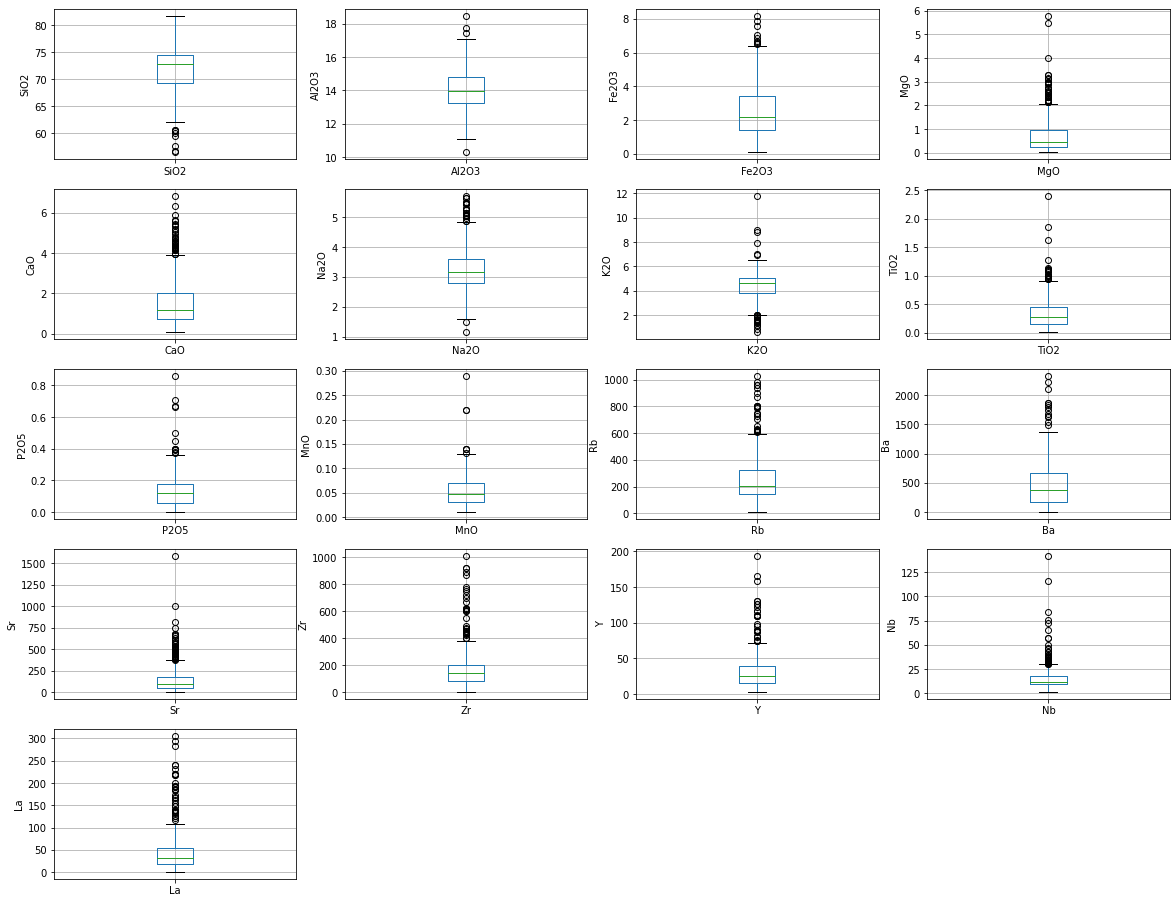

In [8]:
# Exibindo boxplots das variáves selecionadas para treinar os três modelos

plt.figure(figsize=(20, 16))


plt.subplot(5, 4, 1)
fig = data.boxplot(column='SiO2')
fig.set_title('')
fig.set_ylabel('SiO2')


plt.subplot(5, 4, 2)
fig = data.boxplot(column='Al2O3')
fig.set_title('')
fig.set_ylabel('Al2O3')


plt.subplot(5, 4, 3)
fig = data.boxplot(column='Fe2O3')
fig.set_title('')
fig.set_ylabel('Fe2O3')


plt.subplot(5, 4, 4)
fig = data.boxplot(column='MgO')
fig.set_title('')
fig.set_ylabel('MgO')


plt.subplot(5, 4, 5)
fig = data.boxplot(column='CaO')
fig.set_title('')
fig.set_ylabel('CaO')


plt.subplot(5, 4, 6)
fig = data.boxplot(column='Na2O')
fig.set_title('')
fig.set_ylabel('Na2O')


plt.subplot(5, 4, 7)
fig = data.boxplot(column='K2O')
fig.set_title('')
fig.set_ylabel('K2O')


plt.subplot(5, 4, 8)
fig = data.boxplot(column='TiO2')
fig.set_title('')
fig.set_ylabel('TiO2')


plt.subplot(5, 4, 9)
fig = data.boxplot(column='P2O5')
fig.set_title('')
fig.set_ylabel('P2O5')


plt.subplot(5, 4, 10)
fig = data.boxplot(column='MnO')
fig.set_title('')
fig.set_ylabel('MnO')

plt.subplot(5, 4, 11)
fig = data.boxplot(column='Rb')
fig.set_title('')
fig.set_ylabel('Rb')


plt.subplot(5, 4, 12)
fig = data.boxplot(column='Ba')
fig.set_title('')
fig.set_ylabel('Ba')


plt.subplot(5, 4, 13)
fig = data.boxplot(column='Sr')
fig.set_title('')
fig.set_ylabel('Sr')


plt.subplot(5, 4, 14)
fig = data.boxplot(column='Zr')
fig.set_title('')
fig.set_ylabel('Zr')


plt.subplot(5, 4, 15)
fig = data.boxplot(column='Y')
fig.set_title('')
fig.set_ylabel('Y')


plt.subplot(5, 4, 16)
fig = data.boxplot(column='Nb')
fig.set_title('')
fig.set_ylabel('Nb')


plt.subplot(5, 4, 17)
fig = data.boxplot(column='La')
fig.set_title('')
fig.set_ylabel('La')

Text(0, 0.5, '%')

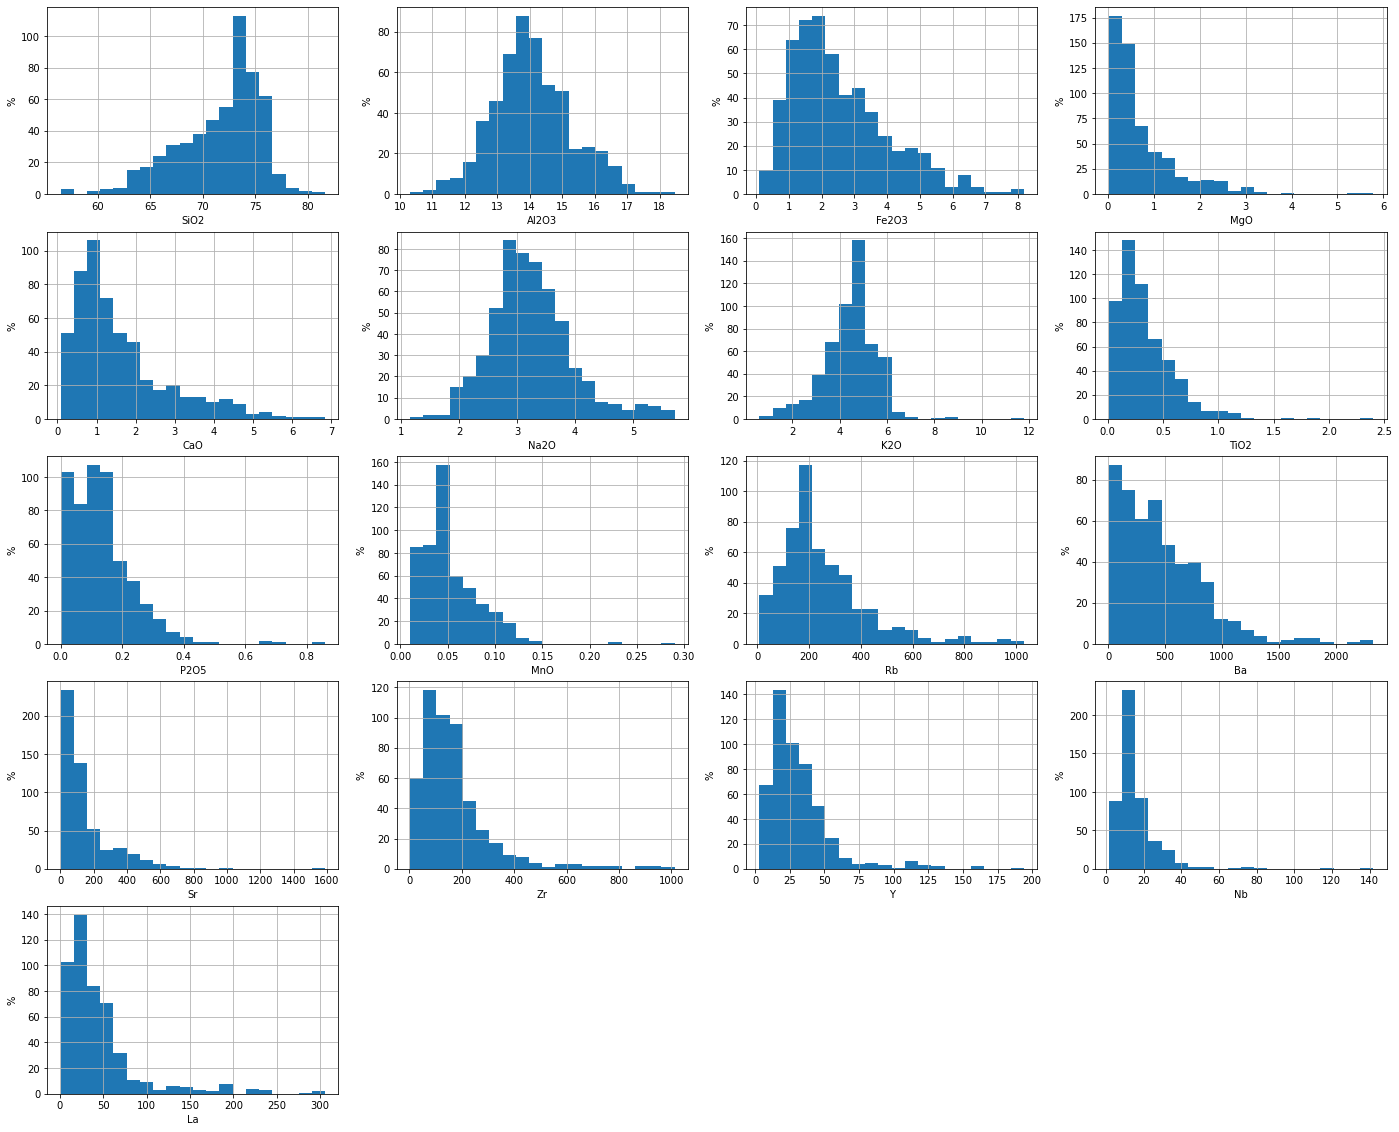

In [9]:
# Checar a distribuição das variáves atrvés de histogramas 


plt.figure(figsize=(24,20))


plt.subplot(5, 4, 1)
fig = data['SiO2'].hist(bins=20)
fig.set_xlabel('SiO2')
fig.set_ylabel('%')


plt.subplot(5, 4, 2)
fig = data['Al2O3'].hist(bins=20)
fig.set_xlabel('Al2O3')
fig.set_ylabel('%')


plt.subplot(5, 4, 3)
fig = data['Fe2O3'].hist(bins=20)
fig.set_xlabel('Fe2O3')
fig.set_ylabel('%')


plt.subplot(5, 4, 4)
fig = data['MgO'].hist(bins=20)
fig.set_xlabel('MgO')
fig.set_ylabel('%')


plt.subplot(5, 4, 5)
fig = data['CaO'].hist(bins=20)
fig.set_xlabel('CaO')
fig.set_ylabel('%')


plt.subplot(5, 4, 6)
fig = data['Na2O'].hist(bins=20)
fig.set_xlabel('Na2O')
fig.set_ylabel('%')


plt.subplot(5, 4, 7)
fig = data['K2O'].hist(bins=20)
fig.set_xlabel('K2O')
fig.set_ylabel('%')


plt.subplot(5, 4, 8)
fig = data['TiO2'].hist(bins=20)
fig.set_xlabel('TiO2')
fig.set_ylabel('%')


plt.subplot(5, 4, 9)
fig = data['P2O5'].hist(bins=20)
fig.set_xlabel('P2O5')
fig.set_ylabel('%')


plt.subplot(5, 4, 10)
fig = data['MnO'].hist(bins=20)
fig.set_xlabel('MnO')
fig.set_ylabel('%')

plt.subplot(5, 4, 11)
fig = data['Rb'].hist(bins=20)
fig.set_xlabel('Rb')
fig.set_ylabel('%')


plt.subplot(5, 4, 12)
fig = data['Ba'].hist(bins=20)
fig.set_xlabel('Ba')
fig.set_ylabel('%')


plt.subplot(5, 4, 13)
fig = data['Sr'].hist(bins=20)
fig.set_xlabel('Sr')
fig.set_ylabel('%')


plt.subplot(5, 4, 14)
fig = data['Zr'].hist(bins=20)
fig.set_xlabel('Zr')
fig.set_ylabel('%')


plt.subplot(5, 4, 15)
fig = data['Y'].hist(bins=20)
fig.set_xlabel('Y')
fig.set_ylabel('%')


plt.subplot(5, 4, 16)
fig = data['Nb'].hist(bins=20)
fig.set_xlabel('Nb')
fig.set_ylabel('%')


plt.subplot(5, 4, 17)
fig = data['La'].hist(bins=20)
fig.set_xlabel('La')
fig.set_ylabel('%')

# Alterando as etiquetas do formato string para int

In [10]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['Type'])

In [11]:
data.head()

,id,sample,SiO2,Al2O3,Fe2O3,MgO,CaO,Na2O,K2O,TiO2,...,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Type,label
0,GS-01,SANA 04,73.84,13.45,1.71,0.34,1.16,2.76,5.57,0.382,...,6.6,0.8,3.6,0.5,1.1,0.12,0.6,0.07,s,1
1,GS-02,SANA 05,67.45,14.89,3.48,0.75,0.95,2.72,6.08,0.759,...,11.6,1.1,4.6,0.7,1.6,0.21,1.3,0.18,s,1
2,GS-03,SANA 06A,67.60,13.86,3.55,0.68,1.86,2.56,5.88,0.744,...,12.5,1.5,7.2,1.3,3.5,0.49,2.7,0.34,s,1
3,GS-04,SANA 06B,68.21,14.61,3.69,0.80,1.98,2.91,5.08,0.898,...,9.1,0.9,4.2,0.7,1.8,0.21,1.1,0.14,s,1
4,GS-05,SANA 07,69.38,14.38,2.45,0.57,1.89,2.79,5.77,0.587,...,5.7,0.6,2.8,0.5,1.2,0.15,0.8,0.10,s,1


# Validação dos dados

Neste ponto é feita uma análise qualitativa dos dados,onde os dados que não atendem os critérios de qualidade adotados tradicionalmente são excluídos do dataset. Os critérios de exclusão de dados são:

- LOI > 2.0
- Total < 98.5 ou Total > 102

In [12]:
data = data.drop(data[data.LOI >= 2.0].index)

In [13]:
data = data.drop(data[(data.Total < 98.0) | (data.Total > 102.0)].index)

In [14]:
# Tamanho final da base de dados
data.shape

(505, 51)

# Pré-processamento

### Tratando missing values

In [15]:
# Criando uma cópia da base de dados
df = data.copy().drop(columns=['id', 'Type', 'sample', 'LOI', 'Total', 'Cs', 'Pb', 'Th', 'U', 'Hf', 'Ta', 'Sc', 'Cr', 'Ni', 'Co', 'V', 'W', 'Ga', 'Zn', 'Cu', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'])

In [16]:
# Calcular a mediana dos atributos com missing values

mediana_p2o5 = df['P2O5'].median()
mediana_mno = df['MnO'].median()
mediana_rb = df['Rb'].median()
mediana_ba = df['Ba'].median()
mediana_sr = df['Sr'].median()
mediana_zr = df['Zr'].median()
mediana_y = df['Y'].median()
mediana_nb = df['Nb'].median()
mediana_la = df['La'].median()

In [17]:
# Substituir os valores faltantes pela mediana de cada variável

df['P2O5'].fillna(mediana_p2o5, inplace=True)
df['MnO'].fillna(mediana_mno, inplace=True)
df['Rb'].fillna(mediana_rb, inplace=True)
df['Ba'].fillna(mediana_ba, inplace=True)
df['Sr'].fillna(mediana_sr, inplace=True)
df['Zr'].fillna(mediana_zr, inplace=True)
df['Y'].fillna(mediana_y, inplace=True)
df['Nb'].fillna(mediana_nb, inplace=True)
df['La'].fillna(mediana_la, inplace=True)

### Conversão de unidades (ppm para %)

In [18]:
df['Rb'] = df['Rb']/10000
df['Ba'] = df['Ba']/10000
df['Sr'] = df['Sr']/10000
df['Zr'] = df['Zr']/10000
df['Y'] = df['Y']/10000
df['Nb'] = df['Nb']/10000
df['La'] = df['La']/10000

In [19]:
df.head()

,SiO2,Al2O3,Fe2O3,MgO,CaO,Na2O,K2O,TiO2,P2O5,MnO,Rb,Ba,Sr,Zr,Y,Nb,La,label
0,73.84,13.45,1.71,0.34,1.16,2.76,5.57,0.382,0.08,0.017,0.0262,0.0503,0.0113,0.0235,0.0011,0.0010,0.0126,1
1,67.45,14.89,3.48,0.75,0.95,2.72,6.08,0.759,0.27,0.040,0.0374,0.0637,0.0128,0.0364,0.0017,0.0018,0.0184,1
2,67.60,13.86,3.55,0.68,1.86,2.56,5.88,0.744,0.22,0.047,0.0266,0.1347,0.0260,0.0603,0.0032,0.0024,0.0241,1
3,68.21,14.61,3.69,0.80,1.98,2.91,5.08,0.898,0.26,0.045,0.0297,0.1256,0.0217,0.0667,0.0017,0.0017,0.0191,1
4,69.38,14.38,2.45,0.57,1.89,2.79,5.77,0.587,0.17,0.033,0.0271,0.1276,0.0213,0.0457,0.0010,0.0012,0.0140,1


# Modelo A

In [20]:
# Criando uma copia da base de dados para treinar o modelo A

df_model_a = df.copy().drop(columns=['Ba', 'Rb', 'Sr', 'Zr', 'Y', 'Nb', 'La'])

In [21]:
# Separando as entradas (x) e saídas (y) do modelo

X = df_model_a.drop(columns=['label'])
y = df_model_a['label']

In [22]:
# separa a base em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

### Identificando as variáveis mais importantes 

In [23]:
f_classif = SelectKBest(score_func=f_classif, k=6)
fit = f_classif.fit(X,y)
features = fit.transform(X)

print(features)

[[7.384e+01 1.710e+00 3.400e-01 1.160e+00 3.820e-01 1.700e-02]
 [6.745e+01 3.480e+00 7.500e-01 9.500e-01 7.590e-01 4.000e-02]
 [6.760e+01 3.550e+00 6.800e-01 1.860e+00 7.440e-01 4.700e-02]
 ...
 [7.565e+01 1.350e+00 1.400e-01 9.800e-01 1.000e-01 4.000e-02]
 [7.212e+01 1.560e+00 1.580e+00 1.180e+00 3.800e-01 4.150e-02]
 [7.276e+01 1.390e+00 1.490e+00 1.270e+00 3.600e-01 4.150e-02]]


In [24]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

,SiO2,Fe2O3,MgO,CaO,TiO2,MnO
0,73.84,1.71,0.34,1.16,0.382,0.0170
1,67.45,3.48,0.75,0.95,0.759,0.0400
2,67.60,3.55,0.68,1.86,0.744,0.0470
3,68.21,3.69,0.80,1.98,0.898,0.0450
4,69.38,2.45,0.57,1.89,0.587,0.0330
...,...,...,...,...,...,...
535,73.43,1.65,0.20,1.36,0.130,0.0400
536,74.14,1.72,0.28,1.07,0.150,0.0500
537,75.65,1.35,0.14,0.98,0.100,0.0400
541,72.12,1.56,1.58,1.18,0.380,0.0415


### Treinando e avaliando o modelo

In [25]:
model_a=SVC(kernel='poly', C=100.0, degree=4, gamma=0.01) 

model_a.fit(X_train,y_train)

y_pred=model_a.predict(X_test)

print('A acurácia do modelo com Kernel polinomial e C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

A acurácia do modelo com Kernel polinomial e C=100.0 : 0.8911


### Matriz de confusão

In [26]:
# Criando a matriz de confusão

cm = confusion_matrix(y_test, y_pred)

print('Matriz de confusão\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Matriz de confusão

 [[46  7]
 [ 4 44]]

True Positives(TP) =  46

True Negatives(TN) =  44

False Positives(FP) =  7

False Negatives(FN) =  4


<AxesSubplot:>

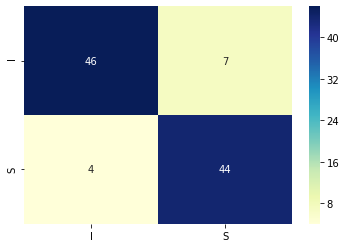

In [27]:
# Transformando a matriz de confusão em uma figura

cm_matrix = pd.DataFrame(data=cm, columns=['I', 'S'], 
                                 index=['I', 'S'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Métricas de avaliação do modelo

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.86      0.92      0.89        48

   micro avg       0.89      0.89      0.89       101
   macro avg       0.89      0.89      0.89       101
weighted avg       0.89      0.89      0.89       101



In [29]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [30]:
classification_accuracy_model_a = (TP + TN) / float(TP + TN + FP + FN)
classification_error_model_a = (FP + FN) / float(TP + TN + FP + FN)
precision_model_a = TP / float(TP + FP)
recall_model_a = TP / float(TP + FN)

print('Acurácia da classificação : {0:0.4f}'.format(classification_accuracy_model_a))
print('Erro de classificação : {0:0.4f}'.format(classification_error_model_a))
print('Precisão : {0:0.4f}'.format(precision_model_a))
print('Recall or Sensitivity : {0:0.4f}'.format(recall_model_a))

Acurácia da classificação : 0.8911
Erro de classificação : 0.1089
Precisão : 0.8679
Recall or Sensitivity : 0.9200


In [31]:
true_positive_rate_model_a = TP / float(TP + FN)
false_positive_rate_model_a = FP / float(FP + TN)
specificity_model_a = TN / (TN + FP)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate_model_a))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_model_a))
print('Specificity : {0:0.4f}'.format(specificity_model_a))

True Positive Rate : 0.9200
False Positive Rate : 0.1373
Specificity : 0.8627


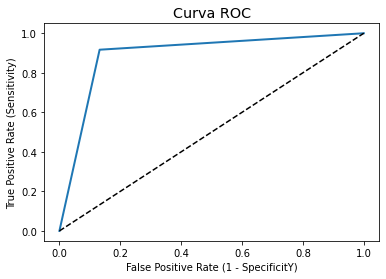

In [32]:
# Plotar curva ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Curva ROC')

plt.xlabel('False Positive Rate (1 - SpecificitY)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [33]:
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8923


# Salvando o modelo 

In [34]:
file = open('model_a', 'wb')
pickle.dump(model_a, file)

# Modelo B

In [35]:
# Criando uma copia da base de dados para treinar o modelo B

df_model_b = df.copy().drop(columns=['La'])

In [36]:
# Separando as entradas (A) e saídas (b) do modelo

A = df_model_b.drop(columns=['label'])
b = df_model_b['label']

In [37]:
# separa a base em treino e teste

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2, stratify=y)

### Treinando e avaliando o modelo

In [38]:
model_b=SVC(kernel='poly', C=100.0, degree=4, gamma=0.01) 

model_b.fit(A_train,b_train)

b_pred=model_b.predict(A_test)

print('A acurácia do modelo com Kernel polinomial e C=100.0 : {0:0.4f}'. format(accuracy_score(b_test, b_pred)))

A acurácia do modelo com Kernel polinomial e C=100.0 : 0.9307


### Matriz de confusão

In [39]:
# Criando a matriz de confusão

cm = confusion_matrix(b_test, b_pred)

print('Matriz de confusão\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Matriz de confusão

 [[48  5]
 [ 2 46]]

True Positives(TP) =  48

True Negatives(TN) =  46

False Positives(FP) =  5

False Negatives(FN) =  2


<AxesSubplot:>

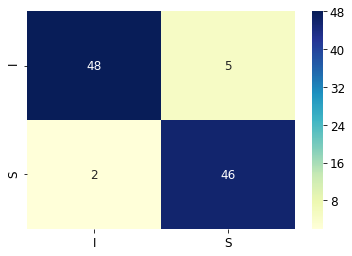

In [40]:
# Transformando a matriz de confusão em uma figura

cm_matrix = pd.DataFrame(data=cm, columns=['I', 'S'], 
                                 index=['I', 'S'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Métricas de avaliação do modelo

In [41]:
print(classification_report(b_test, b_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.90      0.96      0.93        48

   micro avg       0.93      0.93      0.93       101
   macro avg       0.93      0.93      0.93       101
weighted avg       0.93      0.93      0.93       101



In [42]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [43]:
classification_accuracy_model_b = (TP + TN) / float(TP + TN + FP + FN)
classification_error_model_b = (FP + FN) / float(TP + TN + FP + FN)
precision_model_b = TP / float(TP + FP)
recall_model_b = TP / float(TP + FN)

print('Acurácia da classificação : {0:0.4f}'.format(classification_accuracy_model_b))
print('Erro de classificação : {0:0.4f}'.format(classification_error_model_b))
print('Precisão : {0:0.4f}'.format(precision_model_b))
print('Recall or Sensitivity : {0:0.4f}'.format(recall_model_b))

Acurácia da classificação : 0.9307
Erro de classificação : 0.0693
Precisão : 0.9057
Recall or Sensitivity : 0.9600


In [44]:
true_positive_rate_model_b = TP / float(TP + FN)
false_positive_rate_model_b = FP / float(FP + TN)
specificity_model_b = TN / (TN + FP)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate_model_b))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_model_b))
print('Specificity : {0:0.4f}'.format(specificity_model_b))

True Positive Rate : 0.9600
False Positive Rate : 0.0980
Specificity : 0.9020


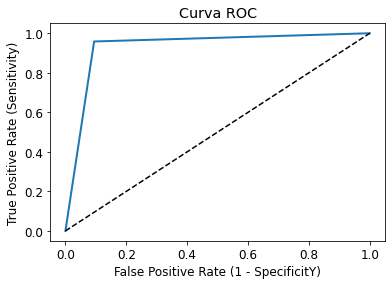

In [45]:
# Plotar curva ROC

fpr, tpr, thresholds = roc_curve(b_test, b_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Curva ROC')

plt.xlabel('False Positive Rate (1 - SpecificitY)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [46]:
ROC_AUC = roc_auc_score(b_test, b_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9320


# Salvando o modelo

In [47]:
file = open('model_b', 'wb')
pickle.dump(model_b, file)

# Modelo C

In [48]:
# Criando uma copia da base de dados para treinar o modelo C

df_model_c = df.copy()

In [49]:
# Separando as entradas (C) e saídas (d) do modelo

C = df_model_c.drop(columns=['label'])
d = df_model_c['label']

In [50]:
# separa a base em treino e teste

C_train, C_test, d_train, d_test = train_test_split(C, d, test_size = 0.2, stratify=y)

### Treinando e avaliando o modelo

In [51]:
model_c=SVC(kernel='poly', C=100.0, degree=4, gamma=0.01) 

model_c.fit(C_train,d_train)

d_pred=model_c.predict(C_test)

print('A acurácia do modelo com Kernel polinomial e C=100.0 : {0:0.4f}'. format(accuracy_score(d_test, d_pred)))

A acurácia do modelo com Kernel polinomial e C=100.0 : 0.9604


### Matriz de confusão

In [52]:
# Criando a matriz de confusão

cm = confusion_matrix(d_test, d_pred)

print('Matriz de confusão\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Matriz de confusão

 [[50  3]
 [ 1 47]]

True Positives(TP) =  50

True Negatives(TN) =  47

False Positives(FP) =  3

False Negatives(FN) =  1


<AxesSubplot:>

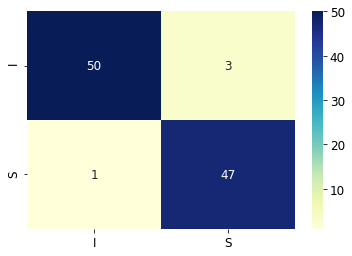

In [53]:
# Transformando a matriz de confusão em uma figura

cm_matrix = pd.DataFrame(data=cm, columns=['I', 'S'], 
                                 index=['I', 'S'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Métricas de avaliação do modelo

In [54]:
print(classification_report(d_test, d_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.94      0.98      0.96        48

   micro avg       0.96      0.96      0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



In [55]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [56]:
classification_accuracy_model_c = (TP + TN) / float(TP + TN + FP + FN)
classification_error_model_c = (FP + FN) / float(TP + TN + FP + FN)
precision_model_c = TP / float(TP + FP)
recall_model_c = TP / float(TP + FN)

print('Acurácia da classificação : {0:0.4f}'.format(classification_accuracy_model_c))
print('Erro de classificação : {0:0.4f}'.format(classification_error_model_c))
print('Precisão : {0:0.4f}'.format(precision_model_c))
print('Recall or Sensitivity : {0:0.4f}'.format(recall_model_c))

Acurácia da classificação : 0.9604
Erro de classificação : 0.0396
Precisão : 0.9434
Recall or Sensitivity : 0.9804


In [57]:
true_positive_rate_model_c = TP / float(TP + FN)
false_positive_rate_model_c = FP / float(FP + TN)
specificity_model_c = TN / (TN + FP)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate_model_c))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate_model_c))
print('Specificity : {0:0.4f}'.format(specificity_model_c))

True Positive Rate : 0.9804
False Positive Rate : 0.0600
Specificity : 0.9400


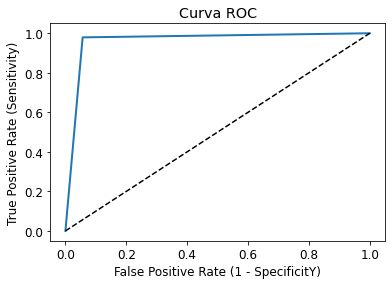

In [58]:
# Plotar curva ROC

fpr, tpr, thresholds = roc_curve(d_test, d_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Curva ROC')

plt.xlabel('False Positive Rate (1 - SpecificitY)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [59]:
ROC_AUC = roc_auc_score(d_test, d_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9613


# Salvando o modelo

In [60]:
file = open('model_c', 'wb')
pickle.dump(model_c, file)